# Икс- точка решена 

 1.3. (5 поени) Што е алфа-бета поткастрување? Зошто користиме алфа-бета поткастрување во оваа игра?

Главен проблем кај МИНИ-МАКС пребарувањето е бројот на состојби што треба да се пребаруваат. Тој број е во експоненцијална зависност од бројот на можни
потези за дадена позиција. Постои начин бројот на состојби што треба да се пребаруваат значително да се намали така што нема непотребно да се испитуваат 
сите јазли во стеблото. Постапката која го овозможува тоа се нарекува АЛФА-БЕТА постапка за потскратување на едно стебло. Многу често таа овозможува
„ отсекување“ на цели потстебла, наместо отсекување само листови. Општиот принцип врз кој е заоснована е следниот : Нека н е произволен јазол во стеблото
 и нека постои дозволен потег односно потези во играта кои играчот го водат во тој јазол. Доколку играчот на располагање има подобар потег на претходното или погорните нивоа,
 јазолот н никогаш нема да биде посетен во текот на играта. Соодветно тој може да биде „ отсечен“ од стеблото.
АЛФА-БЕТА постапката го добила своето име по грчките букви со кои вообичаено се означуваат интервали во математиката. Во конкретниот случај тие се однесуваат на 
интервалите можни вредности на одделните јазли во стеблото на една игра кои постојано се доделуваат во текот на пребарувањето на стеблото. Притоа, алфа е вредноста за 
најдобриот можен потег на МАКС, а бета вредноста на најдобриот можен потег на МИН. АЛФА-БЕТА постапката постојано ги ажурира вредностите за алфа и бета за секој јазол и 
ги отсекува автоматски гранките од даден јазол во случај кога вредноста на тој јазол е полоша од тековната вредност на алфа или бета соодветно, во зависност од тоа дали 
се работи за МАКС или МИН играчот соодветно. АЛФА-БЕТА постатпката ги отфрла сите гранки од стеблото кои не можат на ниеден начин да влијаат врз конечната одлука на 
играчот за неговиот следен потег од дадена позиција. (Извор: „Предавања по предметот машинско учење“ - автор: Елизабета Лазаревска )

Колку јазли да се разгранат без калкулатор ? 
- Јалите се разгрануваат на следниот начин:
    * Првиот играч има 9 можности (таблата е 3 на 3)
    * Вториот играч има 9-1=8 можности
    * Повторно е на ред првиот играч со 9-1-1=7 моѓности...
Значи вкупно 9!=362,8809,но иако 9! ги претставува сите можни распореди на потезите, реалниот број на разгранети јазли 
во мини-макс алгоритмот може да биде многу поголем поради бројот на интермедијарни чекори и потези кои се разгледуваат.
мини-макс алгоритмот ја разгледува секоја можна комбинација на потези, вклучително и разгранувањата кои не водат до конечен 
исход (победа, пораз или реми). Со секој следен потег, бројот на разгранувања експоненцијално расте, бидејќи се разгледуваат сите можни движења на таблата.
Без алфа-бета потскратување, мини-макс алгоритмот мора да ги разгледа сите можни комбинации, без да елиминира ниедна потенцијално слаба гранка, што значи дека 
бројот на јазли може да биде многу поголем од 362,880.

In [3]:
from time import sleep
from collections import deque
from copy import deepcopy
from plotly import graph_objects as go
import ipywidgets as widgets
from IPython.display import display

# Без алфа бета потскратување 

In [19]:
class Game:
    def __init__(self, player_1, player_2):
        self.player_1 = {**player_1, 'symbol': 'x', 'role': 'MAX'}
        self.player_2 = {**player_2, 'symbol': 'o', 'role': 'MIN'}
        self.next_to_play = self.player_1
        self.state = [['·', '·', '·'], ['·', '·', '·'], ['·', '·', '·']]
        self.symbols_fig = {'x': 'x', 'o': 'circle', '·': 'circle-open'}
        self.scores = {'x': 1, 'o': -1, 'draw': 0}
        self.create_ui()
        hbox = widgets.HBox([self.bt_reset, self.dashboard])
        display(widgets.VBox([hbox, self.fig]))
        self.reset()

    def reset(self, *args):
        self.next_to_play = self.player_1
        self.update_score('На ред е', self.next_to_play)
        self.state = [['·', '·', '·'], ['·', '·', '·'], ['·', '·', '·']]
        self.fig.data[0].marker.symbol = self.convert_state_to_symbols()
        self.evaluated = {}
        self.winner = 'keep_playing'
        self.initiate_turn()

    def create_ui(self):
        self.dashboard = widgets.HTML(description='Статус:', value='')
        self.bt_reset = widgets.Button(description='Ресетирај')
        self.bt_reset.on_click(self.reset)
        self.fig = self.create_fig()

    def create_fig(self):
        N = 3
        fig = go.FigureWidget()
        x = [x for y in range(N) for x in range(N)]
        y = [y for y in range(N) for x in range(N)]
        symbols = [self.symbols_fig[v] for row in self.state for v in row]
        fig.add_scatter(x=x, y=y, mode='markers', marker_size=48, 
                        marker_symbol=symbols, marker_color='LightSkyBlue',
                        marker_line_width=6, marker_line_color='MediumPurple')
        fig.data[0].on_click(self.human_move)
        fig.update_xaxes(range=[-0.5, N - 0.5], dtick=1, title='x', side='top')
        fig.update_yaxes(
            range=[-0.5, N - 0.5], dtick=1, title='y', autorange='reversed')
        fig.update_layout(width=600, height=600, showlegend=False)
        return fig

    def convert_state_to_symbols(self):
        return [self.symbols_fig[v] for row in self.state for v in row]

    def initiate_turn(self):
        if 'human' not in [self.player_1['type'], self.player_2['type']]:
            while self.winner == 'keep_playing':
                self.ai_move()
        elif self.next_to_play['type'] == 'AI':
            self.ai_move()

    def ai_move(self):
        self.dashboard.value += ' -- пресметува'
        state = tuple([tuple(row) for row in self.state])
        result, move, total_nodes = self.minimax(state, self.next_to_play['role'])
        print(f"Вкупно разгранети јазли: {total_nodes}")
        sleep(1)
        self.player_took_turn(*move)

    def human_move(self, trace, points, selector):
        x, y = points.xs[0], points.ys[0]
        keep_playing = self.winner == 'keep_playing'
        human_on_turn = self.next_to_play['type'] == 'human'
        empty_place = self.state[y][x] == '·'
        if keep_playing and human_on_turn and empty_place:
            self.player_took_turn(x, y)
            if self.next_to_play['type'] == 'AI':
                self.ai_move()

    def player_took_turn(self, x, y):
        self.state[y][x] = self.next_to_play['symbol']
        self.fig.data[0].marker.symbol = self.convert_state_to_symbols()
        self.winner = self.check_victory(self.state)
        if self.winner != 'keep_playing':
            if self.winner == 'draw':
                self.dashboard.value = 'Нерешено.'
            else:
                self.update_score('Победник е', self.next_to_play)
            return
        if self.next_to_play == self.player_2:
            self.next_to_play = self.player_1
        else:
            self.next_to_play = self.player_2
        self.update_score('На ред е', self.next_to_play)

    def update_score(self, message, player):
        player_data = ' - '.join(list(player.values())[:-1])
        self.dashboard.value = f'{message} <b> {player_data} </b>.'

    def minimax(self, node, player, depth=0, node_count=0):
        winner = self.check_victory(node)
        if winner != 'keep_playing':
            return self.scores[winner], None, node_count + 1
    
        best_value = float('inf') if player == 'MIN' else float('-inf')
        best_move = None
    
        for child, move in self.expand_state(node, player):
            other_player = 'MIN' if player == 'MAX' else 'MAX'
            result, _, node_count = self.minimax(child, other_player, depth + 1, node_count + 1)
    
            if player == 'MIN':
                if result < best_value:
                    best_value = result
                    best_move = move
            else:  # player == 'MAX'
                if result > best_value:
                    best_value = result
                    best_move = move
    
        return best_value, best_move, node_count
    

    def expand_state(self, state, player):
        symbol = 'x' if player == 'MAX' else 'o'
        for y, row in enumerate(state):
            for x, value in enumerate(row):
                if value == '·':
                    new_state = list([list(row) for row in state])
                    new_state[y][x] = symbol
                    yield tuple([tuple(row) for row in new_state]), (x, y)

    def check_victory(self, state,player_symbol=None): # dodaden player_symbol argumet koj go prima funkcijata check vistory
        # проверуваме редици
        for y in range(len(state)):
            if state[y][0] == state[y][1] == state[y][2] and state[y][0] != '·':
                return state[y][0]
        # проверуваме колони
        for x in range(len(state[0])):
            if state[0][x] == state[1][x] == state[2][x] and state[0][x] != '·':
                return state[0][x]
        # проверуваме главна дијагонила
        if state[0][0] == state[1][1] == state[2][2] and state[0][0] != '·':
            return state[0][0]
        # проверуваме споредна дијагонила
        if state[0][2] == state[1][1] == state[2][0] and state[0][2] != '·':
            return state[0][2]
        # проверуваме дали сѐ е пополнето
        if all([value != '·' for row in state for value in row]):
            return 'draw'
        return 'keep_playing'


game = Game({'name': 'Играч 1', 'type': 'AI'}, {'name': 'Играч 2', 'type': 'human'})


Вкупно разгранети јазли: 805113


#  Со алфа-бета потскратување 

In [4]:
class Game:
    def __init__(self, player_1, player_2):
        self.player_1 = {**player_1, 'symbol': 'x', 'role': 'MAX'}
        self.player_2 = {**player_2, 'symbol': 'o', 'role': 'MIN'}
        self.next_to_play = self.player_1
        self.state = [['·', '·', '·'], ['·', '·', '·'], ['·', '·', '·']]
        self.symbols_fig = {'x': 'x', 'o': 'circle', '·': 'circle-open'}
        self.scores = {'x': 1, 'o': -1, 'draw': 0}
        self.create_ui()
        hbox = widgets.HBox([self.bt_reset, self.dashboard])
        display(widgets.VBox([hbox, self.fig]))
        self.reset()

    def reset(self, *args):
        self.next_to_play = self.player_1
        self.update_score('На ред е', self.next_to_play)
        self.state = [['·', '·', '·'], ['·', '·', '·'], ['·', '·', '·']]
        self.fig.data[0].marker.symbol = self.convert_state_to_symbols()
        self.evaluated = {}
        self.winner = 'keep_playing'
        self.initiate_turn()

    def create_ui(self):
        self.dashboard = widgets.HTML(description='Статус:', value='')
        self.bt_reset = widgets.Button(description='Ресетирај')
        self.bt_reset.on_click(self.reset)
        self.fig = self.create_fig()

    def create_fig(self):
        N = 3
        fig = go.FigureWidget()
        x = [x for y in range(N) for x in range(N)]
        y = [y for y in range(N) for x in range(N)]
        symbols = [self.symbols_fig[v] for row in self.state for v in row]
        fig.add_scatter(x=x, y=y, mode='markers', marker_size=48, 
                        marker_symbol=symbols, marker_color='LightSkyBlue',
                        marker_line_width=6, marker_line_color='MediumPurple')
        fig.data[0].on_click(self.human_move)
        fig.update_xaxes(range=[-0.5, N - 0.5], dtick=1, title='x', side='top')
        fig.update_yaxes(
            range=[-0.5, N - 0.5], dtick=1, title='y', autorange='reversed')
        fig.update_layout(width=600, height=600, showlegend=False)
        return fig

    def convert_state_to_symbols(self):
        return [self.symbols_fig[v] for row in self.state for v in row]

    def initiate_turn(self):
        if 'human' not in [self.player_1['type'], self.player_2['type']]:
            while self.winner == 'keep_playing':
                self.ai_move()
        elif self.next_to_play['type'] == 'AI':
            self.ai_move()

    def ai_move(self):
        self.dashboard.value += ' -- пресметува'
        state = tuple([tuple(row) for row in self.state])
        result, move, total_nodes = self.minimax(state, self.next_to_play['role'])
        print(f"Вкупно разгранети јазли: {total_nodes}")
        sleep(1)
        self.player_took_turn(*move)

    def human_move(self, trace, points, selector):
        x, y = points.xs[0], points.ys[0]
        keep_playing = self.winner == 'keep_playing'
        human_on_turn = self.next_to_play['type'] == 'human'
        empty_place = self.state[y][x] == '·'
        if keep_playing and human_on_turn and empty_place:
            self.player_took_turn(x, y)
            if self.next_to_play['type'] == 'AI':
                self.ai_move()

    def player_took_turn(self, x, y):
        self.state[y][x] = self.next_to_play['symbol']
        self.fig.data[0].marker.symbol = self.convert_state_to_symbols()
        self.winner = self.check_victory(self.state)
        if self.winner != 'keep_playing':
            if self.winner == 'draw':
                self.dashboard.value = 'Нерешено.'
            else:
                self.update_score('Победник е', self.next_to_play)
            return
        if self.next_to_play == self.player_2:
            self.next_to_play = self.player_1
        else:
            self.next_to_play = self.player_2
        self.update_score('На ред е', self.next_to_play)

    def update_score(self, message, player):
        player_data = ' - '.join(list(player.values())[:-1])
        self.dashboard.value = f'{message} <b> {player_data} </b>.'

    def minimax(self, node, player, alpha=-2, beta=2, depth=0, node_count=0):
        winner = self.check_victory(node, 'S' if player == 'MAX' else 'P')
        if winner != 'keep_playing':
            return self.scores[winner], None, node_count + 1  # Три вредности
    
        best_value = 2 if player == 'MIN' else -2
        best_move = None
    
        for child, move in self.expand_state(node, player):
            other_player = 'MIN' if player == 'MAX' else 'MAX'
            # Три вредности од рекурзивен повик
            result, _, node_count = self.minimax(child, other_player, alpha, beta, depth + 1, node_count + 1)
            if player == 'MIN':
                if result <= alpha:
                    return result, best_move, node_count
                if result < beta:
                    beta = result
                if result < best_value:
                    best_value = result
                    best_move = move
            elif player == 'MAX':
                if result >= beta:
                    return result, best_move, node_count
                if result > alpha:
                    alpha = result
                if result > best_value:
                    best_value = result
                    best_move = move
    
        return best_value, best_move, node_count

    def expand_state(self, state, player):
        symbol = 'x' if player == 'MAX' else 'o'
        for y, row in enumerate(state):
            for x, value in enumerate(row):
                if value == '·':
                    new_state = list([list(row) for row in state])
                    new_state[y][x] = symbol
                    yield tuple([tuple(row) for row in new_state]), (x, y)

    def check_victory(self, state,player_symbol=None): # dodaden player_symbol argumet koj go prima funkcijata check vistory
        # проверуваме редици
        for y in range(len(state)):
            if state[y][0] == state[y][1] == state[y][2] and state[y][0] != '·':
                return state[y][0]
        # проверуваме колони
        for x in range(len(state[0])):
            if state[0][x] == state[1][x] == state[2][x] and state[0][x] != '·':
                return state[0][x]
        # проверуваме главна дијагонила
        if state[0][0] == state[1][1] == state[2][2] and state[0][0] != '·':
            return state[0][0]
        # проверуваме споредна дијагонила
        if state[0][2] == state[1][1] == state[2][0] and state[0][2] != '·':
            return state[0][2]
        # проверуваме дали сѐ е пополнето
        if all([value != '·' for row in state for value in row]):
            return 'draw'
        return 'keep_playing'


game = Game({'name': '1', 'type': 'AI'}, {'name': '2', 'type': 'human'})

Вкупно разгранети јазли: 25626


# Неколку евалуате стате

In [ ]:
Икс - Точка предлог за евристика:
- Окупација на центарот (односно во колку повеќе дијаголали, редици и колони може да се вброи секое поле добива поголема тежина)
- Ако противникот има шанси да подеби по некоја редица,колона или дијагонала, тоа поле има најголема вредност (поле на приоритет)
- Има приоритет да зазема полиња доколку тие се вбројуваат во повеќе дијагонали,редици,колони се додека нема 2 и трето неблокирано поле 
(цел: за третото поле секогаш да го окупира доколку противникот не го блокирал)

In [6]:
def heuristic_despina(board, player):
    opponent = 'O' if player == 'X' else 'X'
    score = 0

    field_weights = [
        [3, 2, 3],  
        [2, 4, 2],  
        [3, 2, 3]  
    ]
    lines = [
    
        [(0, 0), (0, 1), (0, 2)],
        [(1, 0), (1, 1), (1, 2)],
        [(2, 0), (2, 1), (2, 2)],
        [(0, 0), (1, 0), (2, 0)],
        [(0, 1), (1, 1), (2, 1)],
        [(0, 2), (1, 2), (2, 2)],
        [(0, 0), (1, 1), (2, 2)],
        [(0, 2), (1, 1), (2, 0)]
    ]

    for line in lines:
        player_count = 0
        opponent_count = 0
        empty_count = 0
        empty_pos = None

        for row, col in line:
            if board[row][col] == player:
                player_count += 1
            elif board[row][col] == opponent:
                opponent_count += 1
            else:
                empty_count += 1
                empty_pos = (row, col)

        if player_count == 2 and empty_count == 1:
            score += 50
        elif opponent_count == 2 and empty_count == 1:
            score += 100 
        elif player_count == 1 and empty_count == 2:
            score += 10

        if (1, 1) in line and board[1][1] == player:
            score += 5
    for row in range(3):
        for col in range(3):
            if board[row][col] == player:
                score += field_weights[row][col]
            elif board[row][col] == opponent:
                score -= field_weights[row][col]

    return score


In [7]:
# Пример табла (3x3)
board = [
    ['X', 'O', ' '],
    [' ', 'X', ' '],
    ['O', ' ', ' ']
]

# Играч кој моментално игра
player = 'X'

# Евристичка проценка
h_value = heuristic(board, player)
print(f"Евристичка вредност: {h_value}")


Евристичка вредност: 82


In [ ]:
Посложена... Текстот ваѓи за долните 2

„Икс-Точка“ комбинира неколку принципи за проценка на вредноста на секое поле. Првиот принцип зема предвид растојанието до центарот на таблата, каде што полето е повредно колку е поблиску до центарот, што помага во контролирање на просторот. Вториот принцип доделува дополнителна вредност на полињата што се поврзуваат со други недовршени редици, колони или дијагонали, помагајќи во создавање можности за победа. Третиот принцип дава висока вредност на полињата што се крајни точки на редица, колона или дијагонала која може да се комплетира со два потези, што го фокусира играчот на можните победи. Четвртиот принцип дава највисок приоритет на полињата кои директно го блокираат противникот, засилувајќи ја дефанзивната стратегија. Комбинирањето на овие принципи формира финалната проценка, прилагодувајќи ја тежината на секое поле според моменталната состојба на играта.

Оваа евристика обезбедува балансиран пристап, комбинирајќи контрола на простор, офанзивни врски и дефанзивни блокови.

In [22]:
import numpy as np

def calculate_heuristic(board, x, y, player):
    
    n = board.shape[0] 
    opponent = 'O' if player == 'X' else 'X'
    center_x, center_y = n // 2, n // 2
    h1 = n - np.sqrt((x - center_x)**2 + (y - center_y)**2)
    def count_potential_lines(b, px, py):
        count = 0
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]
        for dx, dy in directions:
            line = []
            for step in range(-2, 3):
                nx, ny = px + step * dx, py + step * dy
                if 0 <= nx < n and 0 <= ny < n:
                    line.append(b[nx, ny])
            if line.count(player) + line.count('.') == len(line):
                count += 1
        return count

    h2 = count_potential_lines(board, x, y)

    def winning_potential(b, px, py, target_player):
        count = 0
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]
        for dx, dy in directions:
            line = []
            for step in range(-2, 3):
                nx, ny = px + step * dx, py + step * dy
                if 0 <= nx < n and 0 <= ny < n:
                    line.append(b[nx, ny])
            if line.count(target_player) == 2 and line.count('.') == 1:
                count += 1
        return count

    h3 = winning_potential(board, x, y, player)
    h4 = winning_potential(board, x, y, opponent)
    w1, w2, w3, w4 = 1.0, 2.0, 3.0, 3.0
    total_heuristic = w1 * h1 + w2 * h2 + w3 * h3 + w4 * h4

    return total_heuristic

# Пример табла и пресметка на евристика
board = np.array([
    ['X', '.', 'O'],
    ['.', 'X', '.'],
    ['O', '.', '.']
])

x, y = 2, 2  # Полето што го проценуваме
player = 'X'
heuristic_value = calculate_heuristic(board, x, y, player)
print(f"Евристичката вредност за полето ({x}, {y}) е: {heuristic_value}")


Евристичката вредност за полето (2, 2) е: 15.585786437626904


In [24]:
import numpy as np

def calculate_heuristic(board, x, y, player):
    n = board.shape[0]  
    opponent = 'O' if player == 'X' else 'X'
    center_x, center_y = n // 2, n // 2
    h1 = n - np.sqrt((x - center_x)**2 + (y - center_y)**2)
    def count_potential_lines(b, px, py):
        count = 0
        near_completion = 0
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]
        for dx, dy in directions:
            line = []
            for step in range(-2, 3):
                nx, ny = px + step * dx, py + step * dy
                if 0 <= nx < n and 0 <= ny < n:
                    line.append(b[nx, ny])
            if line.count(player) + line.count('.') == len(line):
                count += 1
            if line.count(player) == len(line) - 1 and line.count('.') == 1:
                near_completion += 1
        return count, near_completion

    h2, near_h2 = count_potential_lines(board, x, y)
    def weighted_winning_potential(b, px, py, target_player):
        score = 0
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]
        for dx, dy in directions:
            line = []
            for step in range(-2, 3):
                nx, ny = px + step * dx, py + step * dy
                if 0 <= nx < n and 0 <= ny < n:
                    line.append(b[nx, ny])
            if line.count(target_player) == len(line) - 1 and line.count('.') == 1:
                score += len(line)
        return score

    h3 = weighted_winning_potential(board, x, y, player)
    h4 = weighted_winning_potential(board, x, y, opponent)
    def combined_threat_potential(b, px, py):
        """Пресметува потенцијал за создавање на двојни закани (форсирани победи)."""
        threat_count = 0
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]
        for dx1, dy1 in directions:
            for dx2, dy2 in directions:
                if (dx1, dy1) != (dx2, dy2):
                    line1 = []
                    line2 = []
                    for step in range(-2, 3):
                        nx1, ny1 = px + step * dx1, py + step * dy1
                        nx2, ny2 = px + step * dx2, py + step * dy2
                        if 0 <= nx1 < n and 0 <= ny1 < n:
                            line1.append(b[nx1, ny1])
                        if 0 <= nx2 < n and 0 <= ny2 < n:
                            line2.append(b[nx2, ny2])
                    if line1.count(player) == len(line1) - 1 and line1.count('.') == 1 and \
                       line2.count(player) == len(line2) - 1 and line2.count('.') == 1:
                        threat_count += 1
        return threat_count

    h5 = combined_threat_potential(board, x, y)
    w1, w2, w3, w4, w5 = 1.0, 2.0, 3.0, 3.0, 4.0
    total_heuristic = w1 * h1 + w2 * (h2 + near_h2) + w3 * h3 + w4 * h4 + w5 * h5

    return total_heuristic

# Пример табла и пресметка на евристика
board = np.array([
    ['X', '.', 'O'],
    ['.', 'X', '.'],
    ['O', '.', '.']
])

x, y = 2, 1  # Полето што го проценуваме
player = 'X'
heuristic_value = calculate_heuristic(board, x, y, player)
print(f"Евристичката вредност за полето ({x}, {y}) е: {heuristic_value}")


Евристичката вредност за полето (2, 1) е: 14.0


# Цртање на дрвото на играта

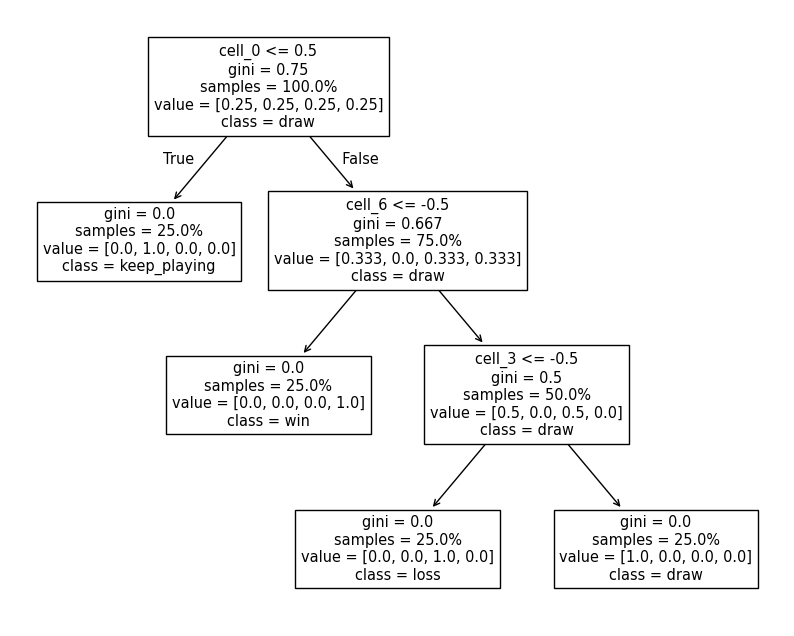

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Примерни податоци: табла 3x3 како редица и соодветни исходи
X = [
    ['X', '.', 'O', '.', 'X', '.', 'O', '.', '.'],  # Примерна состојба
    ['X', 'O', 'O', '.', 'X', '.', '.', '.', '.'],  # Друга состојба
    ['X', 'X', 'O', 'O', 'X', '.', '.', '.', 'O'],  # Трета состојба
    ['.', '.', '.', '.', '.', '.', '.', '.', '.'],  # Почетна состојба
]
y = ['win', 'draw', 'loss', 'keep_playing']  # Исход за секоја состојба

# Конверзија на таблата во нумерички вредности
# 'X' -> 1, 'O' -> -1, '.' -> 0
X_numeric = [[1 if cell == 'X' else -1 if cell == 'O' else 0 for cell in row] for row in X]

# Тренирање на Decision Tree класификатор
clf = DecisionTreeClassifier()
clf.fit(X_numeric, y)

# Визуелизација на дрвото
plt.figure(figsize=(10, 8))
tree.plot_tree(
    clf,
    feature_names=[f"cell_{i}" for i in range(9)],  # Имиња на карактеристики
    class_names=clf.classes_,                      # Имиња на класи
    proportion=True                                # Големината на јазлите пропорционална на нивната фреквенција
)
plt.show()


Decision Tree Rules:
|--- cell_0 <= 0.50
|   |--- class: keep_playing
|--- cell_0 >  0.50
|   |--- cell_8 <= -0.50
|   |   |--- class: loss
|   |--- cell_8 >  -0.50
|   |   |--- cell_1 <= -0.50
|   |   |   |--- class: draw
|   |   |--- cell_1 >  -0.50
|   |   |   |--- class: win



<Figure size 1200x1000 with 0 Axes>

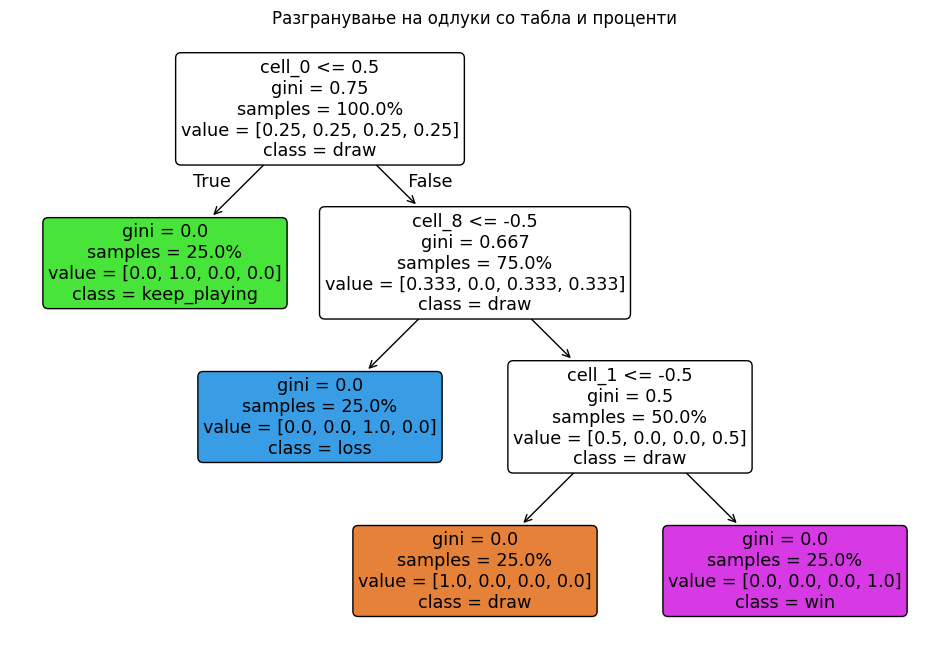

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# Примерни податоци: табла 3x3 како редица и соодветни исходи
X = [
    ['X', '.', 'O', '.', 'X', '.', 'O', '.', '.'],  # Примерна состојба
    ['X', 'O', 'O', '.', 'X', '.', '.', '.', '.'],  # Друга состојба
    ['X', 'X', 'O', 'O', 'X', '.', '.', '.', 'O'],  # Трета состојба
    ['.', '.', '.', '.', '.', '.', '.', '.', '.'],  # Почетна состојба
]
y = ['win', 'draw', 'loss', 'keep_playing']  # Исход за секоја состојба

# Конверзија на таблата во нумерички вредности
X_numeric = [[1 if cell == 'X' else -1 if cell == 'O' else 0 for cell in row] for row in X]

# Тренирање на Decision Tree класификатор
clf = DecisionTreeClassifier()
clf.fit(X_numeric, y)

# Визуелизација со custom графика
plt.figure(figsize=(12, 10))

def visualize_tree_with_custom_labels(clf, feature_names):
    """Го визуелизира дрвото со табла и проценти."""
    tree_data = tree.export_text(clf, feature_names=feature_names, spacing=3)
    print("Decision Tree Rules:")
    print(tree_data)
    
    # Custom визуелизација
    fig, ax = plt.subplots(figsize=(12, 8))
    tree.plot_tree(
        clf,
        feature_names=feature_names,
        class_names=clf.classes_,
        proportion=True,  # Прикажува проценти
        filled=True,      # Боја според класата
        rounded=True,     # Заоблени рамки
        ax=ax
    )
    plt.title("Разгранување на одлуки со табла и проценти")
    plt.show()

visualize_tree_with_custom_labels(clf, feature_names=[f"cell_{i}" for i in range(9)])
